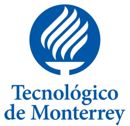

# Master in Applied Artificial Intelligence
## TC 5033 Advanced Machine Learning Methods
### Tecnológico de Monterrey
### Prof José Antonio Cantoral Ceballos
# Activity 2b
## Building a CNN for CIFAR10 Dataset with PyTorch

## Team 18
Team members

> - Francisco Javier Parga García A01794380
> - Matthias Sibrian Illescas A01794249
> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

    Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

### **Part 1: Import Dependencies and Data Preparation**

We begin by importing useful Python libraries, specifically NumPy, PyTorch, Matplotlib, and jupyterthemes. These will be useful to carry out this assignment.

In [29]:
# PyTorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler

# NumPy import
import numpy as np

# Other data-related imports
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

#Jupyterthemes import
from jupyterthemes import jtplot
jtplot.style()

#### Download Cifar10 dataset

This following line of code checks whether your system supports GPU (CUDA) for accelerated computations in PyTorch, which would be useful to use GPU for computation. Returns True if such resource is available, and False if it isn´t.

In [30]:
# Check if CUDA (GPU support) is available in PyTorch
torch.cuda.is_available()

False

In this part, we are constructing a path to a specific data directory in the project. It first gets the root directory path and then appends various folder names to construct the DATA_PATH, the variable that points to the directory where the project's data is located. The os.path.join function is used to combine these folder names into a single string, DATA_PATH.

In [31]:
import os

# Get the root directory path
master_folder = os.path.split(os.path.split(os.getcwd())[0])[0]

# Folder names
class_folder = 'MNA-2023-September_Advanced_Machine_Learning_Methods'
activity_folder = "Activity 2b - Building a CNN for CIFAR10 Dataset with PyTorch"
data_folder = 'data'

# Construct the data path
DATA_PATH = os.path.join(master_folder, class_folder, activity_folder, data_folder)

# Return the data path
DATA_PATH

'/Users/msibrian/Documents/MNA-2023-September_Advanced_Machine_Learning_Methods/Activity 2b - Building a CNN for CIFAR10 Dataset with PyTorch/data'

In this code, we define constants for dataset sizes and minibatch size. We set up data transformations for the CIFAR-10 dataset, and then we create training, validation, and test datasets along with their respective data loaders. These data loaders will be used in the rest of our process.

In [32]:
# Define constants for dataset sizes and minibatch size
NUM_TRAIN = 50000  # Number of training samples
NUM_VAL = 5000  # Number of validation samples
NUM_TEST = 5000  # Number of test samples
MINIBATCH_SIZE = 64  # Size of minibatches

# Define data transformations for the CIFAR-10 dataset
transform_cifar = T.Compose([
    T.ToTensor(),  # Convert images to PyTorch tensors
    T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])  # Normalize pixel values
])

# Create the training dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Create the validation dataset
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))

# Create the test dataset
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


The following check ('cifar10_train') verifies information about the CIFAR-10 training dataset. It shows the number of data points (50000), the dataset's root location on the file system, and the applied transformations, which include converting images to tensors and normalizing the observations.

In [33]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /Users/msibrian/Documents/MNA-2023-September_Advanced_Machine_Learning_Methods/Activity 2b - Building a CNN for CIFAR10 Dataset with PyTorch/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

Then, we verify the number of data samples processed in each iteration during training, which is 64.

In [34]:
# Get the batch size of the 'train_loader' DataLoader
train_loader.batch_size

64

### **Part 2: Checking Environment and Exploring Data**

#### Using  GPUs

Then, we verify if we might be able to use GPUs for faster computations by checking if CUDA is available. A simple print indicates which device will be used, if processing via GPUs with CUDA, or processing with CPU.

In [36]:
# Check if CUDA (GPU support) is available and set the device accordingly
if torch.cuda.is_available():
    device = torch.device('cuda')  # Use GPU if available
else:
    device = torch.device('cpu')  # Use CPU if GPU is not available

# Print the selected device (GPU or CPU)
print(device)


cpu


#### Mostrar imágenes

Next, we first get class names from the test loader. Then, we define a function to plot a single image from the CIFAR-10 dataset. We randomly select an index, print the corresponding class name, and normalize the image before showing it using the plot_figure function.

In [37]:
# Get the class names from the test loader
classes = test_loader.dataset.classes

In [10]:
# This function plots a single image from the CIFAR-10 dataset
def plot_figure(image):
    plt.figure(figsize=(3,3))
    # Transpose the image to have the correct shape for displaying
    plt.imshow(np.transpose(image,(1,2,0)))
    # Turn off the axis labels
    plt.axis('off')
    # Show the plot
    plt.show()

La imagen muestreada representa un: ship


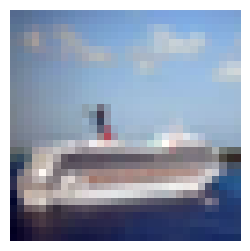

In [11]:
# Randomly select an index from the test loader
rnd_sample_idx = np.random.randint(len(test_loader))
# Print the class name of the image at the selected index
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
# Get the image at the selected index
image = test_loader.dataset[rnd_sample_idx][0]
# Normalize the image to have values between 0 and 1
image = (image - image.min()) / (image.max() -image.min() )
# Call the function to plot the image
plot_figure(image)

This function plots a grid of images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. This means the task corresponds to a classification problem that is multiclass, which is also supervised.

In [39]:
def plot_cifar10_grid():
    # Get the class names from the test loader
    classes = test_loader.dataset.classes
    # Set the number of samples to display per class
    total_samples = 8
    # Create a figure with a large size
    plt.figure(figsize=(11,11))
    # Loop over each class label and sample name
    for label, sample in enumerate(classes):
        # Find the indices of the images that belong to the current class
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        # Randomly select some indices from the class without replacement
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        # Loop over each selected index
        for i, idx in enumerate(sample_idxs):
            # Calculate the subplot index based on the row and column position
            plt_idx = i*len(classes) + label + 1
            # Create a subplot at the given index
            plt.subplot(total_samples, len(classes), plt_idx)
            # Display the image at the given index
            plt.imshow(test_loader.dataset.data[idx])
            # Turn off the axis labels
            plt.axis('off')
            
            # If this is the first row, add the class name as the title
            if i == 0: plt.title(sample)
    # Show the plot
    plt.show()

We call the function to see the images:

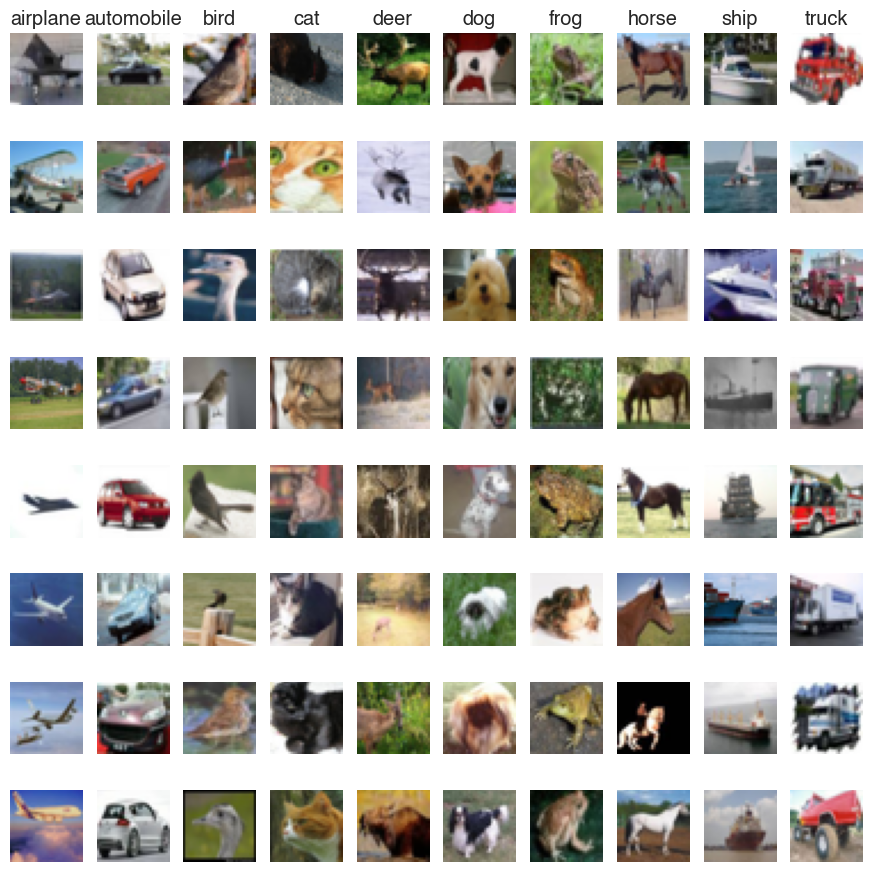

In [40]:
# Call the function to plot the grid of images
plot_cifar10_grid()

### **Part 3: Defining Metrics and Designing the Training Loop**

#### Calcular accuracy


This function calculates the accuracy of a model on a given data loader. Basically, it calculates the accuracy of a given model on a provided data loader by comparing the model's predictions to the true labels. It's designed for evaluating the performance of the models based on this metric, which is the one we have defined to measure the success of this activity.

In [41]:
def accuracy(model, loader):
    # Initialize the number of correct predictions and the total number of predictions
    num_correct = 0
    num_total = 0
    # Set the model to evaluation mode
    model.eval()
    # Move the model to the device (CPU or GPU)
    model = model.to(device=device)
    # Disable gradient computation to speed up the inference
    with torch.no_grad():
        # Loop over each batch of data in the loader
        for (xi, yi) in loader:
            # Move the input and output data to the device
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            # Get the model's scores (logits) for each class
            scores = model(xi) #
            # Get the predicted class by finding the maximum score along the dimension 1
            _, pred = scores.max(dim=1) 
            # Count how many predictions are correct by comparing them with the true labels
            num_correct += (pred == yi).sum()
            # Count the total number of predictions
            num_total += pred.size(0)
        # Return the accuracy as the ratio of correct predictions to total predictions
        return float(num_correct)/num_total

#### Loop de entrenamiento

This function trains a model on the training data loader and evaluates it on the validation data loader. It does so over a specified number of epochs and records the loss and accuracy values for each one. It also prints the progress of the training process. The results it collects in each iteration are returned in a dictionary named train_results, so that it can be accessed later in an easy manner.

In [42]:
def train(model, optimizer, epochs=100):
    # Initialize two lists to store the cost and accuracy values for each epoch
    costo_list = []
    acc_list = []
    
    # Move the model to the device (CPU or GPU)
    model = model.to(device=device)
    # Loop over the number of epochs
    for epoch in range(epochs):
        # Loop over each batch of data in the training loader
        for i, (xi, yi) in enumerate(train_loader):
            # Set the model to training mode
            model.train()
            # Move the input and output data to the device
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Zero out the gradients of the optimizer
            optimizer.zero_grad()
            # Get the model's scores (logits) for each class
            scores = model(xi)

            # Calculate the cross-entropy loss between the scores and the true labels
            cost = F.cross_entropy(input= scores, target=yi)
                 
            # Compute the gradients of the loss with respect to the model's parameters
            cost.backward()
            # Update the model's parameters using the optimizer
            optimizer.step()           
            
        # Calculate the accuracy of the model on the validation loader
        acc = accuracy(model, val_loader)
        
        # Append the cost and accuracy values to the respective lists
        costo_list.append(cost.tolist())
        acc_list.append(acc)   
        
        # Print the epoch number, cost value, and accuracy value
        print(f'Epoca {epoch}, costo: {np.round(cost.tolist(),4)}, accuracy: {np.round(acc,4)}')
        
    # Create a dictionary to store the cost and accuracy lists
    train_results = {'costo':costo_list, 'accuracy':acc_list} 
    # Return the dictionary
    return train_results

### **Part 4: Initial Architecture**

#### Linear model

Next, we set the number of hidden units for two layers, the learning rate for the optimizer, and the number of training epochs. We then define a neural network model with three linear layers and two ReLU activation functions. The model is optimized using the Adam optimizer with the specified learning rate and beta parameters.

In [16]:
# Set the number of hidden units for the first and second hidden layers
hidden1 = 256 
hidden = 256
# Set the learning rate for the optimizer
lr = 5e-4
# Set the number of epochs for training
epochs = 23

# Define a model as a sequential neural network with three linear layers and two ReLU activations
model1 = nn.Sequential(nn.Flatten(),
                        nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                        nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                        nn.Linear(in_features=hidden, out_features=10))

# Define an optimizer as Adam with the given learning rate and betas
optimizer = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

Now, we train using this architecture made up using only linear layers.

In [17]:
train_results_linear = train(model1, optimizer, epochs)

Epoca 0, costo: 1.4513, accuracy: 0.4916
Epoca 1, costo: 1.2149, accuracy: 0.5128
Epoca 2, costo: 1.9002, accuracy: 0.5172
Epoca 3, costo: 1.1731, accuracy: 0.5354
Epoca 4, costo: 1.1238, accuracy: 0.5386
Epoca 5, costo: 0.4937, accuracy: 0.531
Epoca 6, costo: 1.4318, accuracy: 0.5498
Epoca 7, costo: 0.7915, accuracy: 0.5452
Epoca 8, costo: 1.0677, accuracy: 0.543
Epoca 9, costo: 0.8827, accuracy: 0.525
Epoca 10, costo: 0.3323, accuracy: 0.5416
Epoca 11, costo: 0.6851, accuracy: 0.5464
Epoca 12, costo: 1.1624, accuracy: 0.537
Epoca 13, costo: 0.5586, accuracy: 0.5434
Epoca 14, costo: 0.5062, accuracy: 0.5394
Epoca 15, costo: 1.2816, accuracy: 0.5324
Epoca 16, costo: 0.6148, accuracy: 0.538
Epoca 17, costo: 0.1845, accuracy: 0.5244
Epoca 18, costo: 0.2921, accuracy: 0.5294
Epoca 19, costo: 0.8757, accuracy: 0.537
Epoca 20, costo: 0.5207, accuracy: 0.5312
Epoca 21, costo: 0.3453, accuracy: 0.5246
Epoca 22, costo: 0.2678, accuracy: 0.5208


This results in training for the linear model demonstrate a gradual improvement in accuracy over time, suggesting that the model is learning from the data. However, the accuracy values are low, which suggest that this architecture is not the most adequate.

We now crete a function that generates a plot that visualizes the training results, including cost and accuracy, over the training epochs. We have done this to see how the metrics evolve during training.

In [45]:
def plot_training_results(train_results, y_range=(0,1)):

    # Convert the cost list to a NumPy array
    loss_arr = np.array(train_results['costo'])
    # Convert the accuracy list to a NumPy array
    acc_arr = np.array(train_results['accuracy'])
    
    # Plot the cost array with a label 'Cost'
    plt.plot(loss_arr, label = 'Cost')
    # Plot the accuracy array with a label 'Accuracy'
    plt.plot(acc_arr, label = 'Accuracy')
    # Create a legend for the plot
    plt.legend()
    
    # Get the current axes object of the plot
    axes = plt.gca()
    
    # Set the lower and upper limits of the y-axis to 0 and 1
    axes.set_ylim(y_range[0],y_range[1])
    # Set the label of the x-axis to 'Epoch' with a font size of 14
    axes.set_xlabel("Epoch", fontsize=14)
    # Set the label of the y-axis to 'Cost & Accuracy' with a font size of 14
    axes.set_ylabel("Cost & Accuracy", fontsize=14)
    # Set the title of the plot to 'Training Results' with a font size of 18
    axes.set_title('Training Results', fontsize=18)
    
    # Display the plot on the screen
    plt.show()

We get the plot:

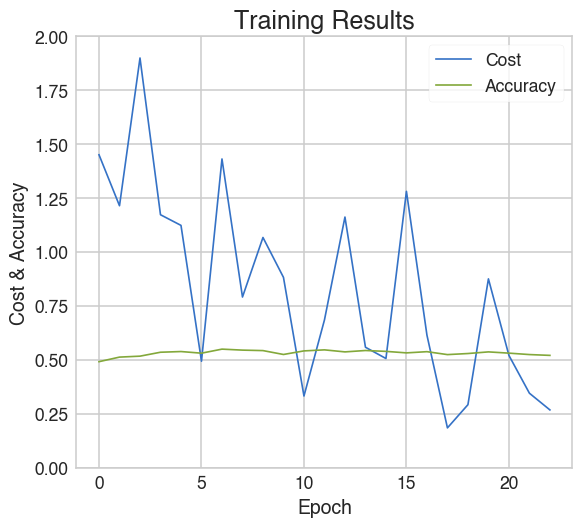

In [46]:
plot_training_results(train_results_linear, y_range=(0,2))

Based on this graph, it is evident that:

* The model's accuracy doesn't show a clear trend of improvement over the training epochs, but rather it remains almost constant.This suggests the model is under performing.

* Cost values are fluctuating between epochs.

### **Part 5: CNN Architecture**

#### Sequential CNN

Next, we proceed with a change in architecture. We now define a convolutional neural network (CNN) model, named modelCNN1, along with an optimizer for training. Unlike a model based solely on linear layers, like the previous one, this CNN architecture is designed to excel at tasks like this one, involving image classification, given that these new layers capture spatial hierarchies and reduce the dimensionality of the data.

In [47]:
# Set the learning rate for the optimizer
lr = 1e-3
# Set the number of epochs for training
epochs = 23

# Define a model as a sequential convolutional neural network with three convolutional layers, three ReLU activations, three max pooling layers, two linear layers, and two more ReLU activations
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
                          nn.ReLU(),
                          nn.MaxPool2d(kernel_size=2),
                          nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
                          nn.ReLU(),
                          nn.MaxPool2d(kernel_size=2),
                          nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
                          nn.ReLU(),
                          nn.MaxPool2d(kernel_size=2),
                          nn.Flatten(),
                          nn.Linear(in_features=128, out_features=64),
                          nn.ReLU(),
                          nn.Linear(in_features=64, out_features=32),
                          nn.ReLU(),
                          nn.Linear(in_features=32, out_features=10),
                         )
                          
# Define an optimizer as Adam with the given learning rate
optimizer_cnn = torch.optim.Adam(modelCNN1.parameters(), lr=lr)

Now, we train using this new architecture:

In [48]:
train_results_cnn = train(modelCNN1, optimizer_cnn, epochs)

Epoca 0, costo: 1.2954, accuracy: 0.4464
Epoca 1, costo: 1.2454, accuracy: 0.4942
Epoca 2, costo: 1.3677, accuracy: 0.5316
Epoca 3, costo: 1.3166, accuracy: 0.5622
Epoca 4, costo: 1.2921, accuracy: 0.5868
Epoca 5, costo: 0.7677, accuracy: 0.6048
Epoca 6, costo: 1.2496, accuracy: 0.6132
Epoca 7, costo: 0.8329, accuracy: 0.6172
Epoca 8, costo: 0.7581, accuracy: 0.6284
Epoca 9, costo: 1.3594, accuracy: 0.6382
Epoca 10, costo: 0.9745, accuracy: 0.6498
Epoca 11, costo: 0.7025, accuracy: 0.6386
Epoca 12, costo: 1.0712, accuracy: 0.6448
Epoca 13, costo: 1.0379, accuracy: 0.6416
Epoca 14, costo: 0.6712, accuracy: 0.6566
Epoca 15, costo: 0.7218, accuracy: 0.6536
Epoca 16, costo: 0.6851, accuracy: 0.645
Epoca 17, costo: 0.4899, accuracy: 0.6546
Epoca 18, costo: 0.7147, accuracy: 0.648
Epoca 19, costo: 0.7781, accuracy: 0.6544
Epoca 20, costo: 1.3226, accuracy: 0.6662
Epoca 21, costo: 0.7474, accuracy: 0.6474
Epoca 22, costo: 0.8157, accuracy: 0.6652


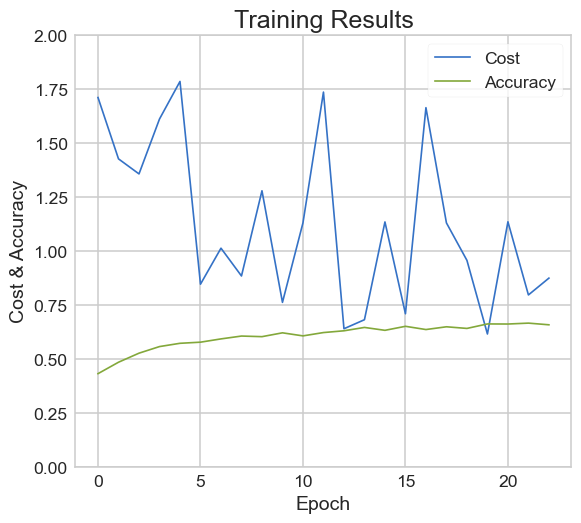

In [22]:
plot_training_results(train_results_cnn, y_range=(0,2))

Based on this graph, it is evident that:

* The model's accuracy was benefitted by the change in architecture. The value increased with each new epoch of the network's training process to a higher value than before.

* Cost values keep fluctuating between epochs.

### **Part 6: Analysis and Documentation**

#### Architecture Choices

The architecture chosen begins with three convolutional layers, each designed to recognize patterns and features in the input data, such as edges in images. After each convolution, a Rectified Linear Unit (ReLU) activation function is applied to capture complex patterns. Following the convolutions, max-pooling layers reduce data size while retaining essential information. A flattening layer reshapes the data for processing. Two fully connected linear layers then combine the high-level features extracted from the convolutional layers and introduce non-linearity using ReLU activations. The final output layer, consisting of ten neurons, assigns class probabilities. The choice of Adam optimizer adapts model parameters well. The reason we chose this architecture is to benefit from the advantages each provides and how well they work in conjunction.

#### Performance Differences
The CNN performed better than the neural network that used only linear layers. The best accuracy result for the model using linear layers was 0.5464, whereas the best accuracy result for the CNN was 0.6662. This is a key difference, probably due to the change in architecture and the capacity to capture non-linearities in data.

#### Final Insights
Key takeaways:
* The Architecture using three convolutional layers, three ReLU activations, three max pooling layers, two linear layers, and two more ReLU activations improved accuracy by 0.1156 when compared to the initial architecture that used only linear layers.
* Model performance benefits from layers that capture non-linearity and that perform convolutional transformations of data.